In [0]:
Clinicaltrial_2021 = "/FileStore/tables/clinicaltrial_2021.csv"
Clinicaltrial_2020 = "/FileStore/tables/clinicaltrial_2020.csv"
Clinicaltrial_2019 = "/FileStore/tables/clinicaltrial_2019.csv"
Mesh = "/FileStore/tables/mesh.csv"
Pharma = "/FileStore/tables/pharma.csv"

In [0]:
from pyspark.sql.functions import *

In [0]:
myDF_2021 = spark.read.options(delimiter="|").csv(Clinicaltrial_2021, header='True')

In [0]:
MeshDF = spark.read.option('delimiter',',').csv(Mesh, header='True')
 

In [0]:
PharmaDF = spark.read.option('delimiter',',').csv(Pharma, header='True')

In [0]:
#printing the distinct count

print('Distinct count in clinicaltrial_2021 Dataset is :', myDF_2021.distinct().count())


Distinct count in clinicaltrial_2021 Dataset is : 387261


In [0]:
#Types of Studies in the Clinicaltrial_2021 dataset

myDF_2021.groupBy('Type').count().orderBy('count', ascending=False).show(truncate=False)

+--------------------------------+------+
|Type                            |count |
+--------------------------------+------+
|Interventional                  |301472|
|Observational                   |77540 |
|Observational [Patient Registry]|8180  |
|Expanded Access                 |69    |
+--------------------------------+------+



In [0]:
#Top 5 conditions with their frequencies

split_topFive2021 = myDF_2021.withColumn('Conditions',explode(split('Conditions',',')))

split_topFive2021.groupBy('Conditions').count().orderBy('count', ascending=False).show(5)

+-----------------+-----+
|       Conditions|count|
+-----------------+-----+
|        Carcinoma|13389|
|Diabetes Mellitus|11080|
|        Neoplasms| 9371|
| Breast Neoplasms| 8640|
|         Syndrome| 8032|
+-----------------+-----+
only showing top 5 rows



In [0]:
#The Five most frequent roots

#splitting the Conditions column of the clinical trial DF using the Comma Delimiter
split_topFive2021 = myDF_2021.withColumn('Conditions',explode(split('Conditions',',')))

#Creating a frequentrootsDF to join the MeshDF and splitDF
frequentrootsDF = MeshDF.join(split_topFive2021, MeshDF.term == split_topFive2021.Conditions, 'right').withColumn('tree',substring('tree',1,3))
frequentrootsDF.display()

term,tree,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
Autistic Disorder,F03,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,Autistic Disorder,null
Autism Spectrum Disorder,F03,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,Autism Spectrum Disorder,null
Diabetes Mellitus,C19,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
Diabetes Mellitus,C18,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
Tuberculosis,C01,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,Tuberculosis,null
Lung Diseases,C08,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,Lung Diseases,null
null,null,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,Pulmonary Disease,null
Diverticular Diseases,C06,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,Diverticular Diseases,null
Diverticulum,C23,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,Diverticulum,null
Diverticulum,C06,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,Diverticulum,null


In [0]:
#Grouping the FrequentrootsDF by the required parameters of tree and count

frequentrootsDF.groupBy('tree').count().orderBy('count', ascending=False).show(5)

+----+------+
|tree| count|
+----+------+
| C04|143994|
| C23|136079|
| C01|106674|
| C14| 94523|
| C10| 92310|
+----+------+
only showing top 5 rows



In [0]:
# The 10 most common sponsors that are not Pharmaceutical companies

#joining the dataframes using left_anti statement

combinedDF = myDF_2021.join(
   PharmaDF
    ,(PharmaDF['Parent_Company'] == myDF_2021['Sponsor'])
    ,'left_anti'
     )
filteredDF = combinedDF.filter(combinedDF.Status!='Active')
filteredDF.display()

Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null
NCT02757209,Consorzio Futuro in Ricerca,Completed,Apr 2016,Jan 2018,Interventional,Apr 2016,Asthma,"Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate"
NCT02752438,Ankara University,Unknown status,May 2016,Jul 2017,Observational [Patient Registry],Apr 2016,Hypoventilation,null
NCT02753543,Ruijin Hospital,Unknown status,Nov 2015,Nov 2019,Interventional,Apr 2016,Lymphoma,null
NCT02757508,Washington University School of Medicine,Completed,Mar 2016,Jul 2017,Interventional,Apr 2016,null,Vitamins
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null


In [0]:
###Grouping and displaying the dataframes showing the result
newDF2021 = combinedDF.groupBy("Sponsor").count().orderBy('count', ascending=False).show(10)

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3218|
|M.D. Anderson Can...| 2414|
|Assistance Publiq...| 2369|
|         Mayo Clinic| 2300|
|Merck Sharp & Doh...| 2243|
|   Assiut University| 2154|
|Novartis Pharmace...| 2088|
|Massachusetts Gen...| 1971|
|    Cairo University| 1928|
|   Hoffmann-La Roche| 1828|
+--------------------+-----+
only showing top 10 rows



In [0]:
#Number of completed studies each month in a given year

#Filtering the clinical trial dataset to extract the rows with Completed Status in 2021 using the Completion column and selecting the months only
completedDF=myDF_2021.filter(myDF_2021.Status=="Completed").filter(col("Completion").endswith("2021")).withColumn('Completion',substring('Completion',1,3))
display(completedDF)

Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02753530,Orphazyme,Completed,Aug 2017,Jan,Interventional,Apr 2016,Myositis,null
NCT02758704,St. Justine's Hospital,Completed,Oct 2015,Jun,Interventional,Apr 2016,null,null
NCT02754778,Martin-Luther-Universität Halle-Wittenberg,Completed,Apr 2016,Mar,Interventional,Apr 2016,"Pre-Eclampsia,HELLP Syndrome,Syndrome",null
NCT02758782,"Charite University, Berlin, Germany",Completed,Sep 2016,Jan,Interventional,Apr 2016,Spondylitis,"Celecoxib,Golimumab"
NCT02751151,Inova Health Care Services,Completed,Feb 2016,May,Interventional,Mar 2016,Skin Neoplasms,Aminolevulinic Acid
NCT02759575,Vinita Takiar,Completed,Apr 2016,Feb,Interventional,Apr 2016,"Carcinoma,Squamous Cell Carcinoma of Head and Neck",Pembrolizumab
NCT02758626,NYU Langone Health,Completed,Nov 2016,Feb,Interventional,Apr 2016,"Epilepsy,Epilepsies",null
NCT02755402,Centre hospitalier de l'Université de Montréal (CHUM),Completed,Jan 2017,May,Interventional,Apr 2016,Hepatitis C,null
NCT02758574,University of Pittsburgh,Completed,May 2016,Aug,Interventional,Mar 2016,"Pulmonary Embolism,Embolism",null
NCT02750215,Massachusetts General Hospital,Completed,May 2016,May,Interventional,Apr 2016,Lung Neoplasms,null


In [0]:
#Sorting and arranging the CompletedDF according to the calendar months in 2021

CompletedDF2 = completedDF.groupBy("Completion").count().sort(unix_timestamp(col("Completion"),"MMM"))
display(CompletedDF2)

Completion,count
Jan,1131
Feb,934
Mar,1227
Apr,967
May,984
Jun,1094
Jul,819
Aug,700
Sep,528
Oct,187


Out[118]: Text(0.5, 1.0, 'Completed Studies in 2021')

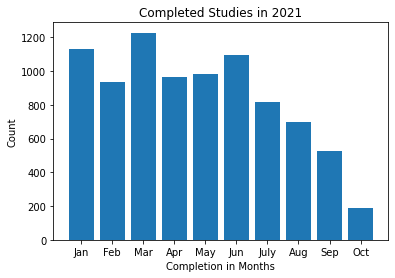

In [0]:
#Importing the pyplot functions
from matplotlib import pyplot as view

view.bar(("Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct"), [1131,934,1227,967,984,1094,819,700,528,187])
view.xlabel("Completion in Months")
view.ylabel("Count")
view.title("Completed Studies in 2021")